# Importing all necessary packages

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import opendatasets as od

# Connecting to my kaggle account and downloading relevant dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: agroall
 ··········
Your Kaggle Key:Downloading uber-and-lyft-dataset-boston-ma.zip to ./uber-and-lyft-dataset-boston-ma


100%|██████████| 44.5M/44.5M [00:00<00:00, 51.4MB/s]


# Previewing dataset

In [ ]:
# os.listdir('./uber-and-lyft-dataset-boston-ma')
rides = pd.read_csv('uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [11]:
print(rides.shape)
rides.head()

(693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Important Notes.**
                                                                                

1.   Multiple Sources of Time data (timestanp & datetime) Consider the timezone column if you're using datetime.
2.   Investigate Temperature and Apparent Temperature.
3.   Not all columns seems useful, drop irrelevant columns as metadata.

# Cleaning dataset

Subsetting relevant columns

In [ ]:
relevant_columns = ['datetime', 'timezone', 'hour', 'month', 'cab_type', 'price',
                    'distance','product_id', 'latitude', 'longitude', 'temperature', 'apparentTemperature']
rides_analysis = rides[relevant_columns].copy()

Checking for missing data

In [ ]:
rides_analysis.isna().sum()

datetime                   0
timezone                   0
hour                       0
month                      0
cab_type                   0
price                  55095
distance                   0
product_id                 0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
dtype: int64

Price is the target feature, all observations without price should be dropped.                                    

In [12]:
rides_analysis.dropna(inplace=True)
rides_analysis.isna().sum()

datetime               0
timezone               0
hour                   0
month                  0
cab_type               0
price                  0
distance               0
product_id             0
latitude               0
longitude              0
temperature            0
apparentTemperature    0
dtype: int64

# Exploratory Data Analysis

Checking for correlations in the datasets between distance and price


The Pearson Correlation between the price and the distance travelled is 0.34506106627965094


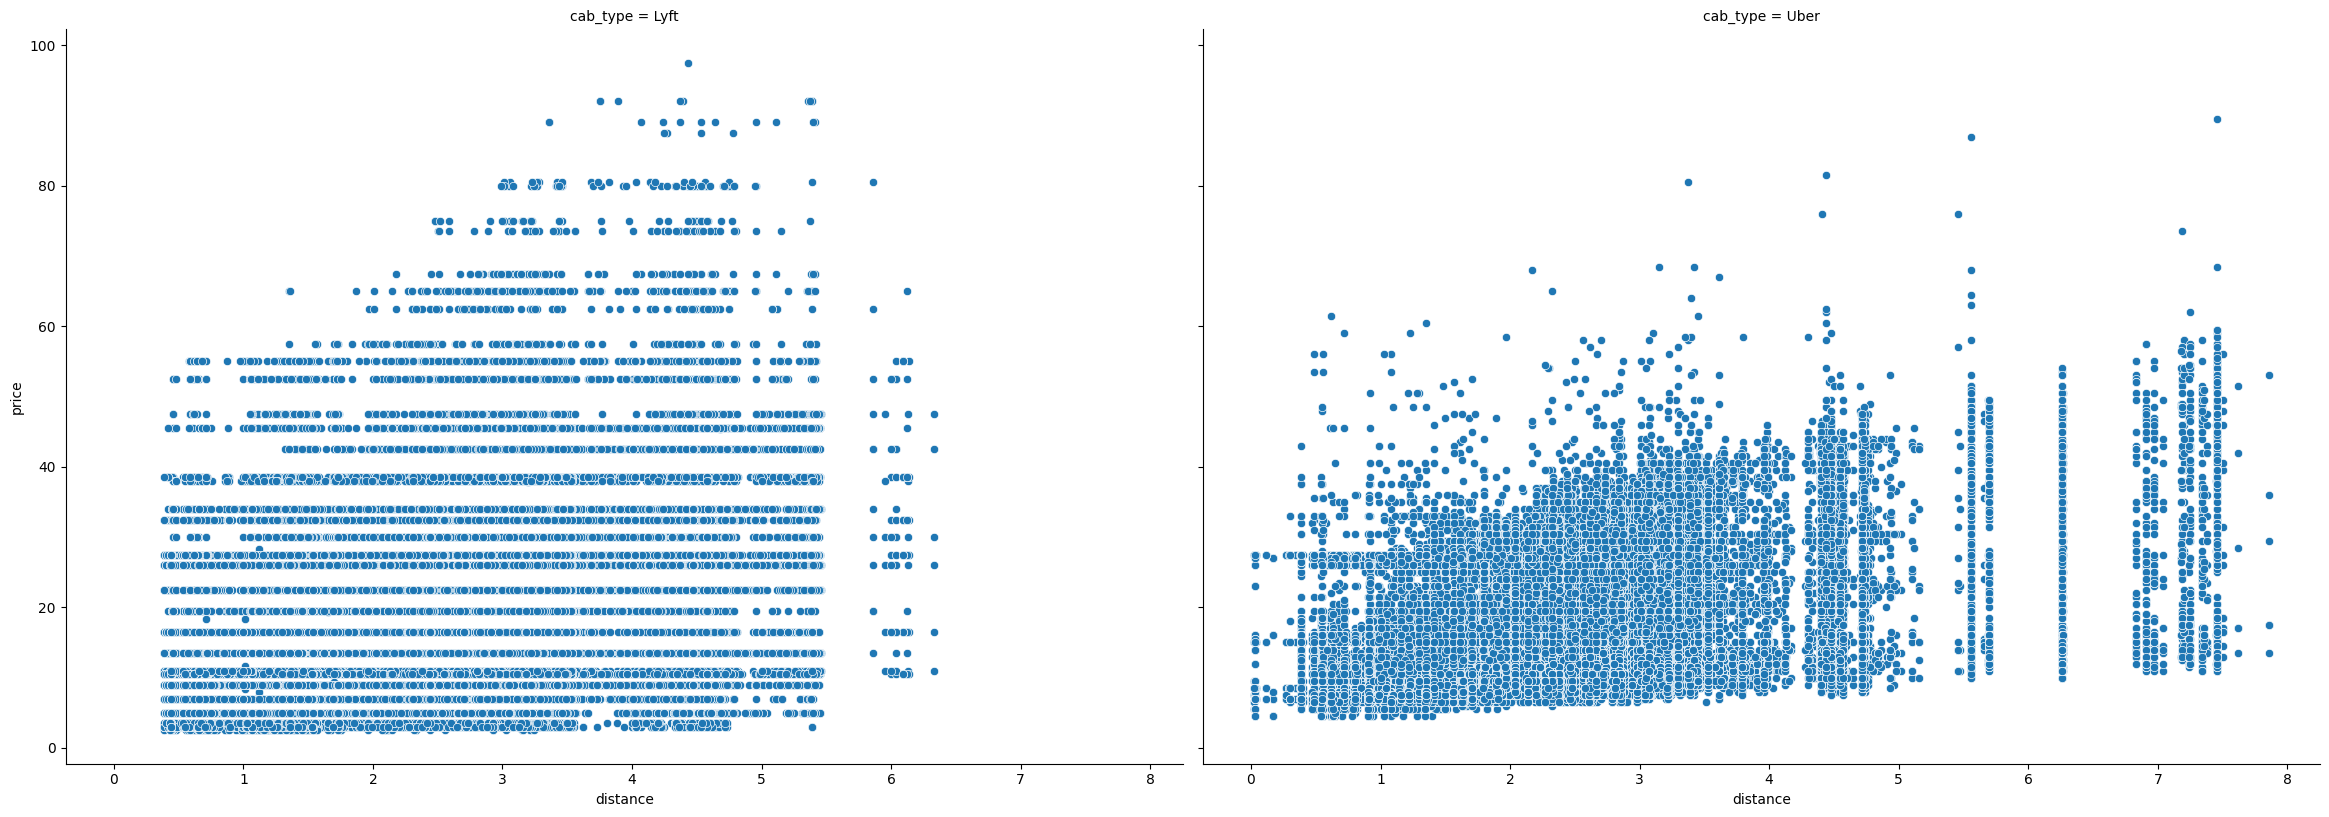

In [17]:
sns.relplot(
            x='distance',
            y='price',
            data=rides_analysis,
            kind='scatter',
            col='cab_type',
            zzzzzzzzzzzzzzzzzzheight=8.27,
            aspect=11.7/8.27
            )
# plt.title('Scatter Plot Of Distance vs Price Split by Cab Type')

print(f'The Pearson Correlation between the price and the distance travelled is {rides_analysis.price.corr(rides_analysis.distance)}')

There's some correlation between distance and price.


# Checking for Busiest day

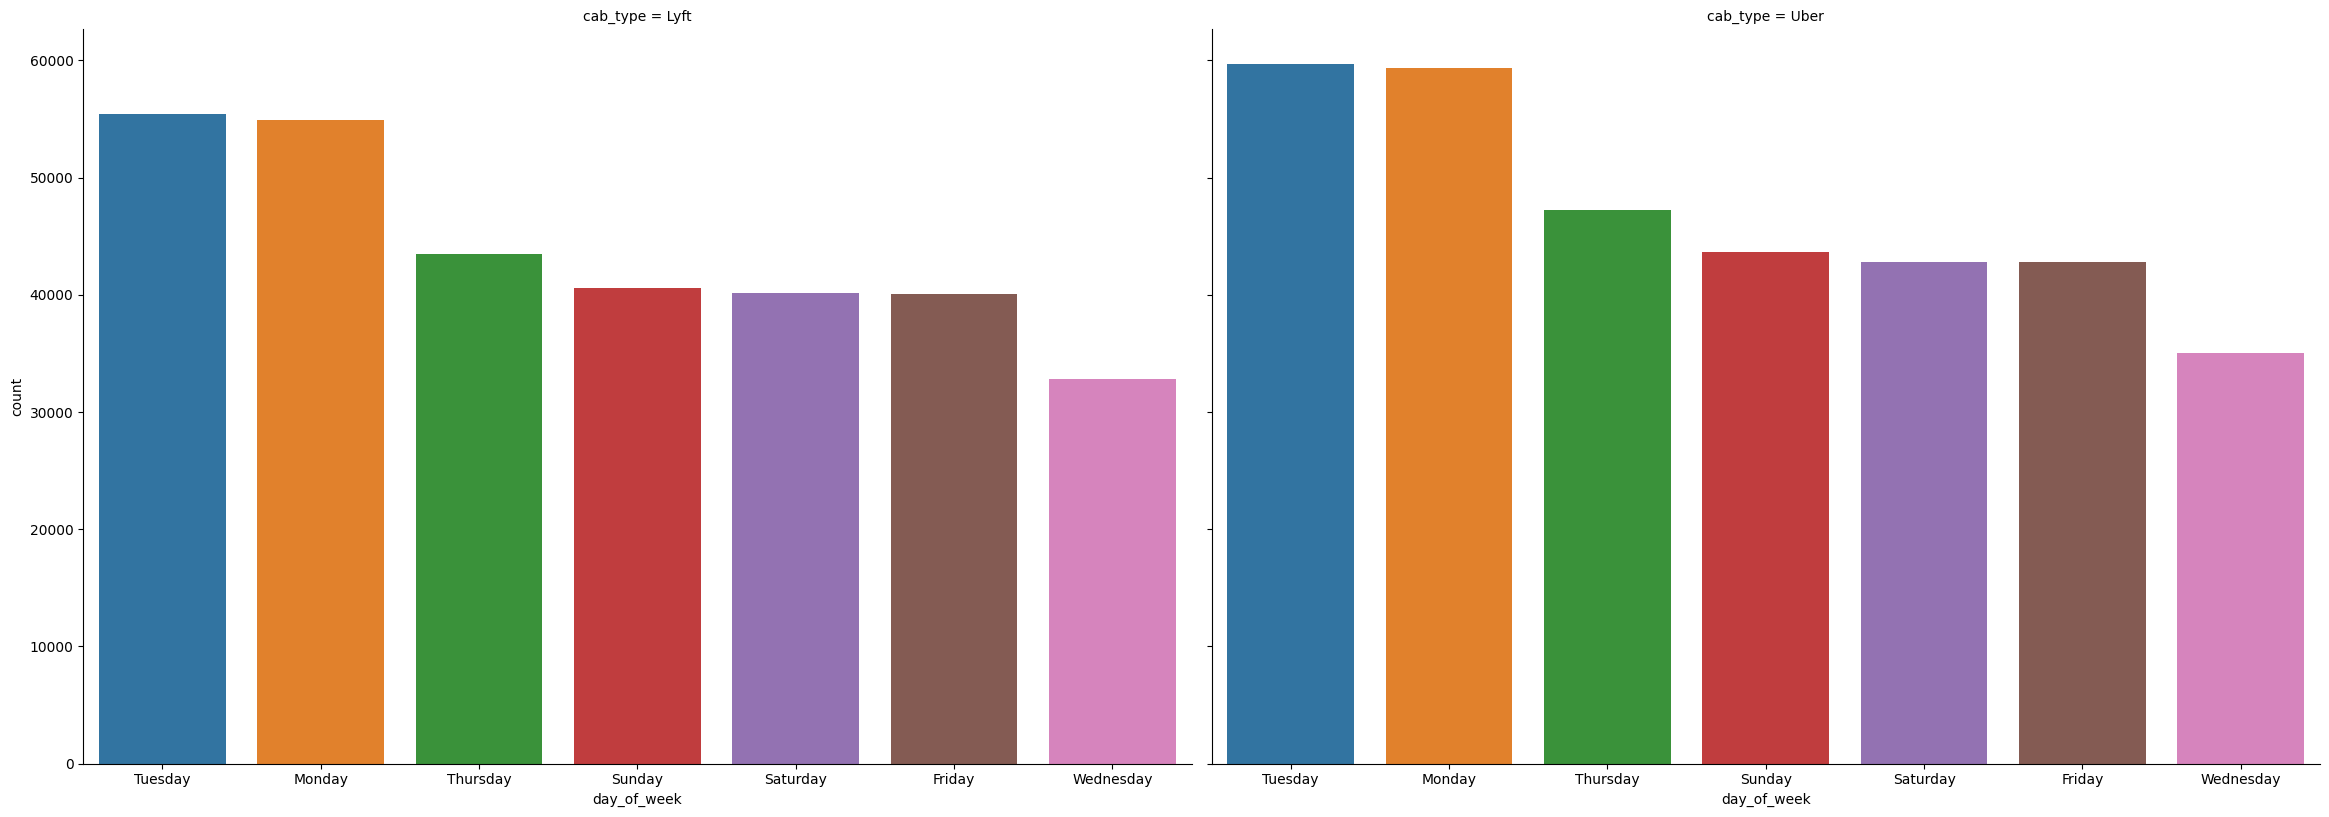

In [ ]:
# Creating_day_of_week_column
day_of_week=[]
for dat in rides_analysis['datetime']:
  day_of_week.append(dat.strftime("%A"))
rides_analysis.insert(4,'day_of_week',day_of_week)

week=rides_analysis.value_counts('day_of_week')

sns.catplot(x='day_of_week'
            ,col='cab_type'
            ,data=rides_analysis
            ,kind='count'
            ,height=8.27
            ,aspect=11.7/8.27
            ,order=week.index)

Both Uber and Lyft share an identical distribution with Monday and Tuesday having significantly more rides than other days

# Hour_of_day_analysis

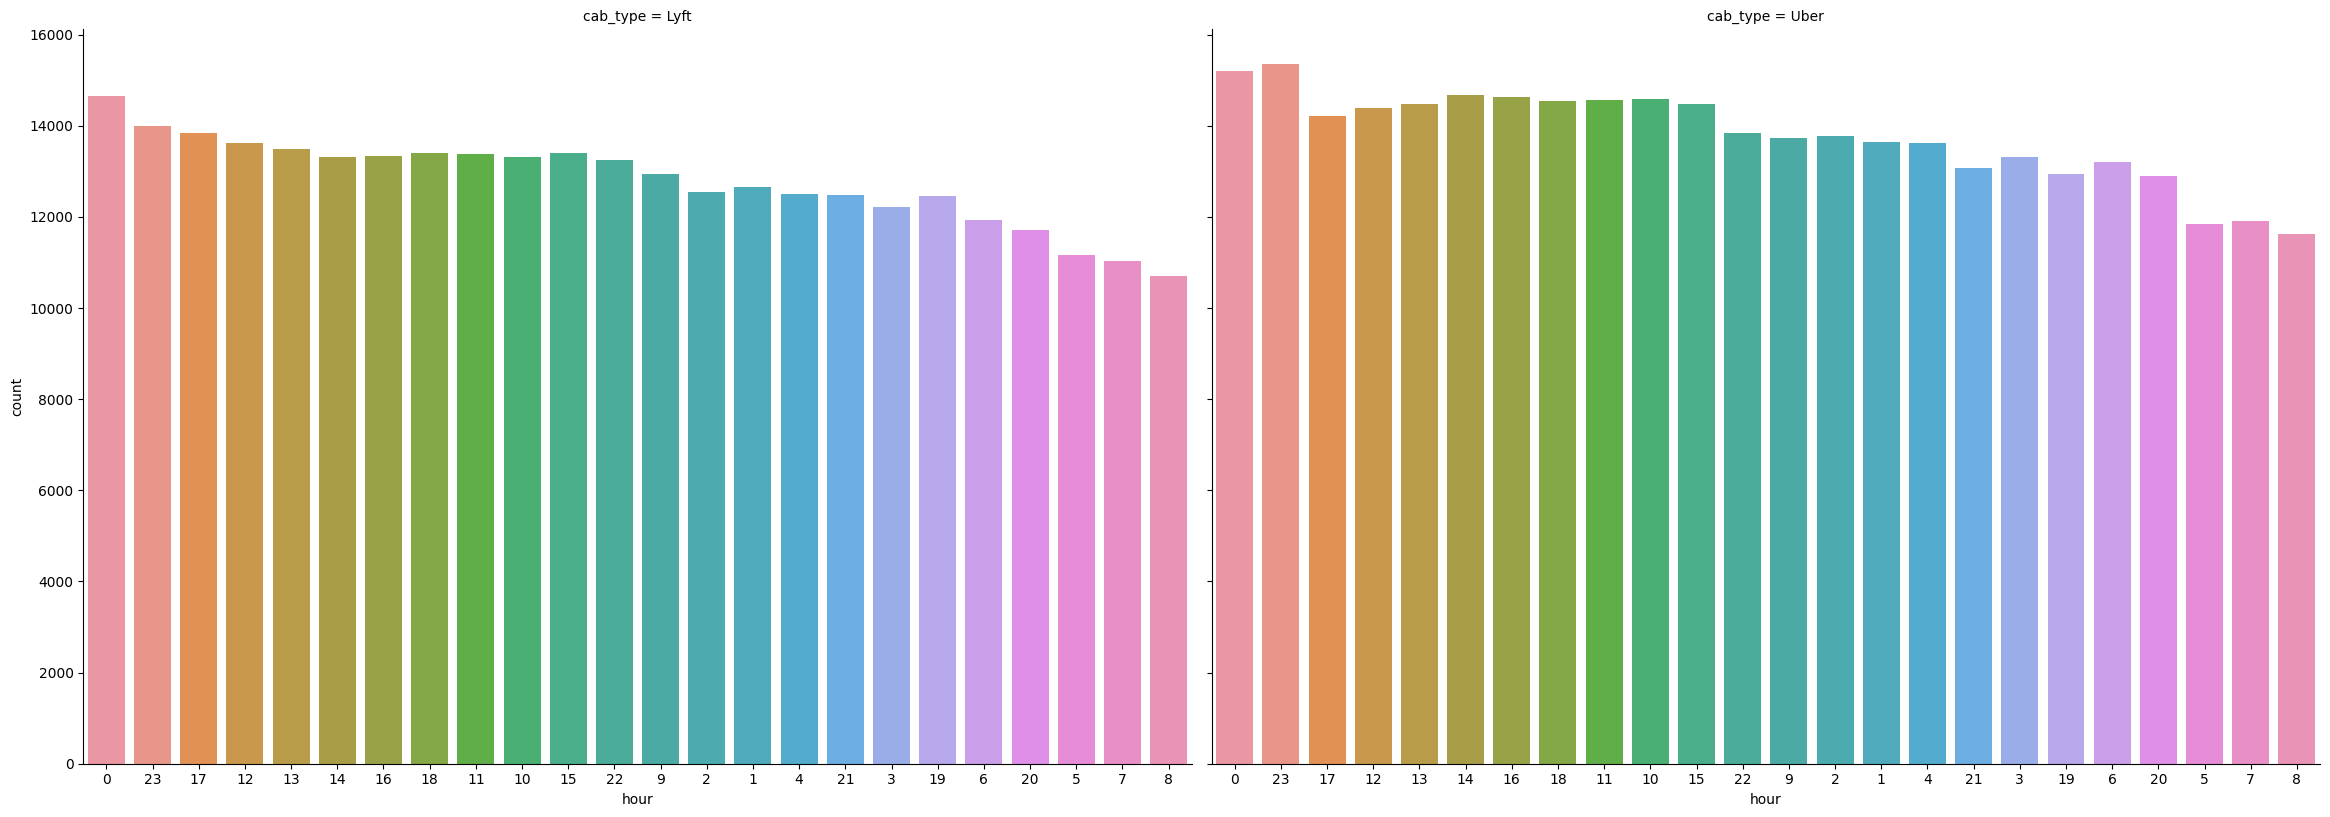

In [ ]:
rides_analysis.insert(5,'hour',rides['hour'])
order=rides_analysis.value_counts('hour')
sns.catplot(x='hour'
            ,data=rides_analysis
            ,col='cab_type'
            ,kind='count'
            ,height=8.27
            ,aspect=11.7/8.27
            ,order=order.index
            )

# Effect_of_temperature_and_apparent_temperature

In [ ]:
rides_analysis.insert(6,'temperature',rides['temperature'])
rides_analysis.insert(7,'apparentTemperature',rides['apparentTemperature'])

def temp_fixer(temperature):
  if temperature < 20:
    return 'Cool'
  elif temperature < 30:
    return 'Warm'
  elif temperature < 37:
    return 'Hot'
  elif temperature < 49:
    return 'Very hot'
  else:
    return 'Extremely hot'

rides_analysis['weather_summary']=rides_analysis['temperature'].apply(temp_fixer)
rides_analysis['apparent_weather_summary']=rides_analysis['apparentTemperature'].apply(temp_fixer)

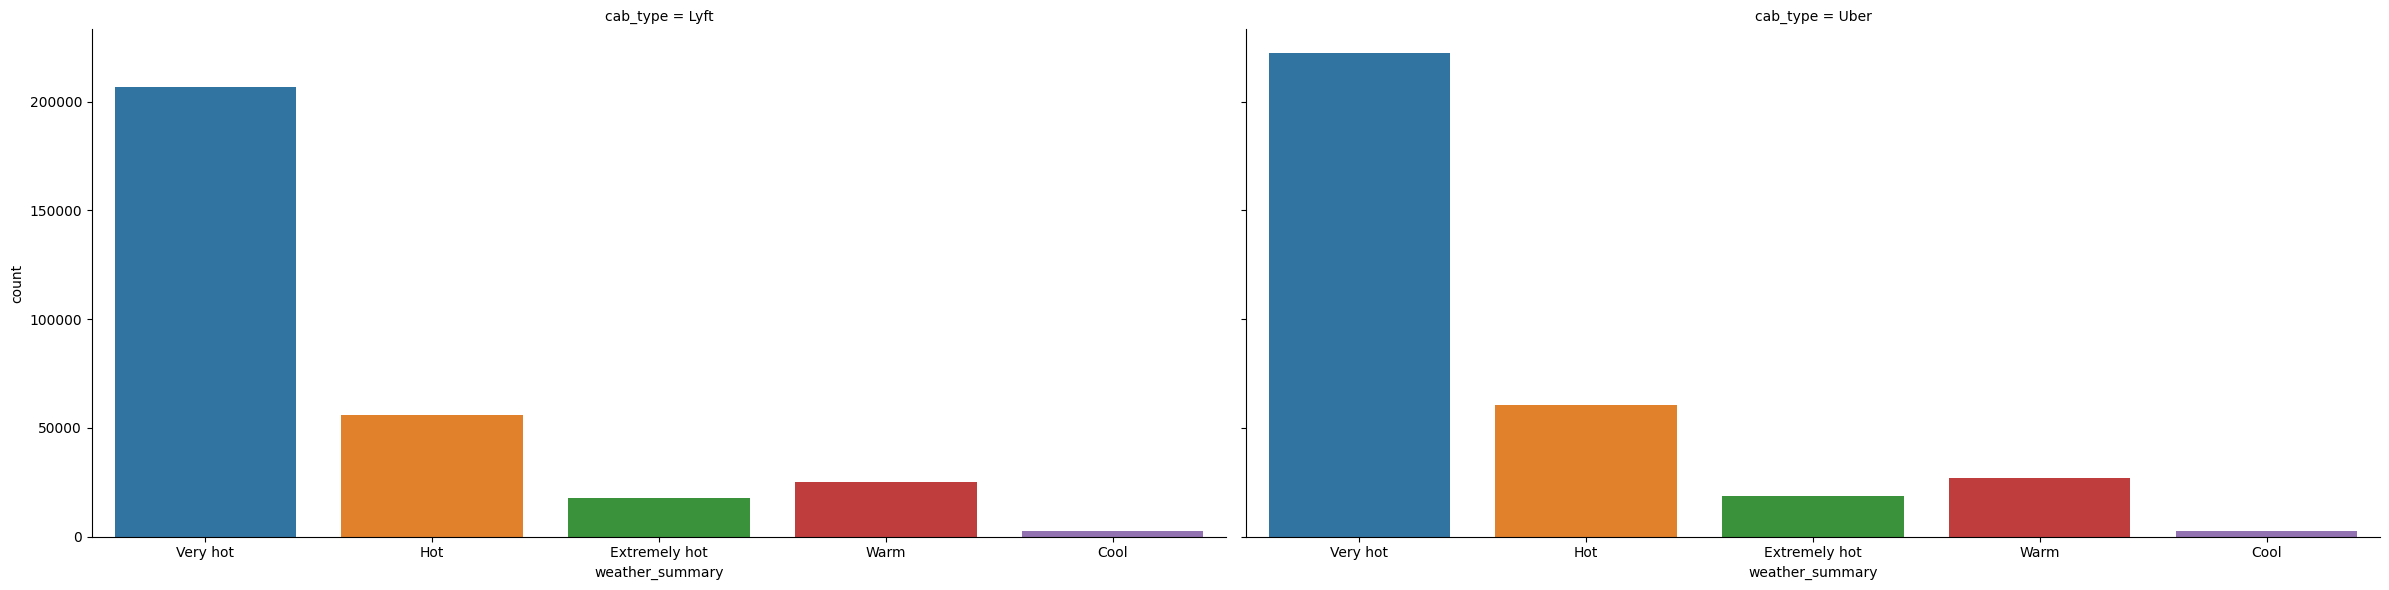

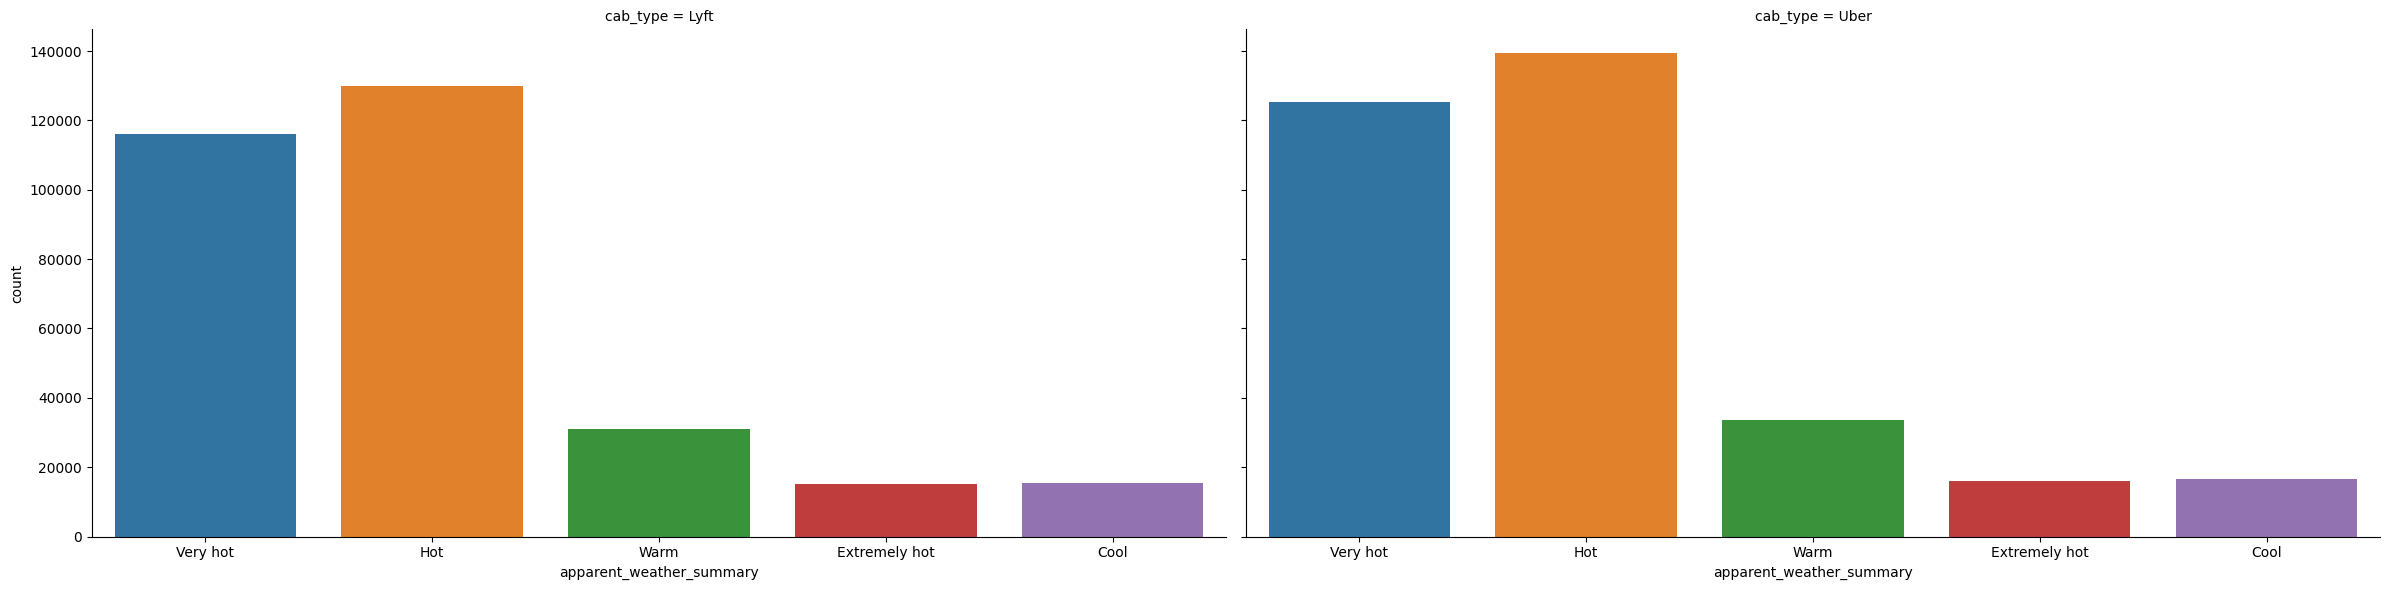

In [ ]:
sns.catplot(x='weather_summary'
            ,data=rides_analysis
            ,col='cab_type'
            ,kind='count'
            ,height=4
            ,aspect=8/4)

sns.catplot(x='apparent_weather_summary'
            ,data=rides_analysis
            ,col='cab_type'
            ,kind='count'
            ,height=4
            ,aspect=8/4)

# types_of_cab


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

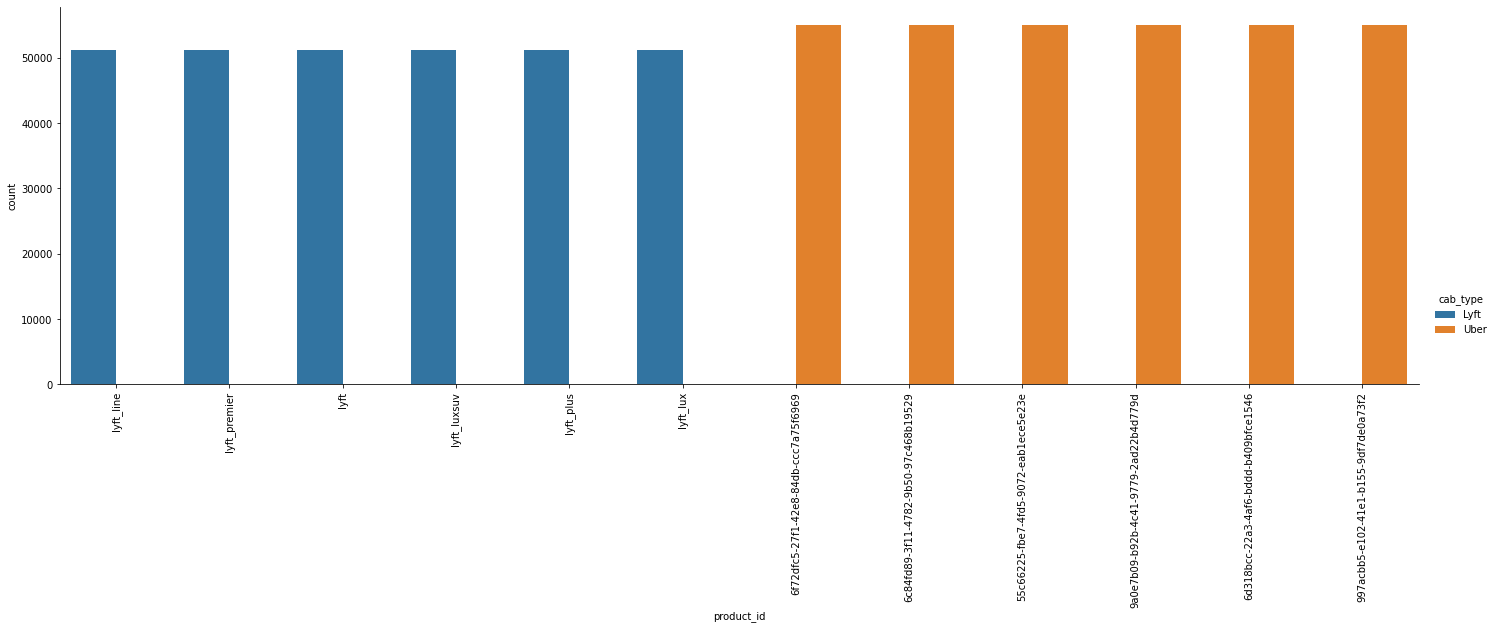

In [ ]:
sns.catplot(x='product_id'
            ,kind='count'
            ,data=rides_analysis
            ,hue='cab_type'
            ,height=6
            ,aspect=20/6)
plt.xticks(rotation=90)

# Finally,_build_models